A2
HORSE VS HUMAN
BINARY

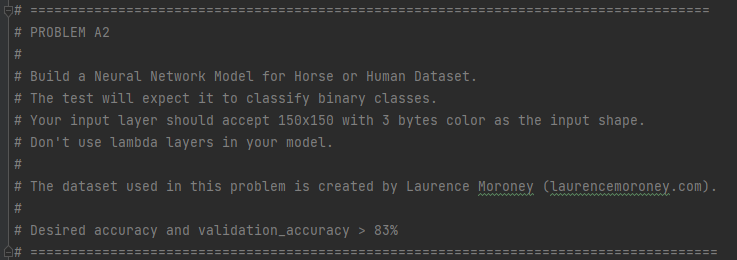

In [ ]:
import urllib.request
import zipfile
import tensorflow as tf
import os
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [ ]:
def solution_A2():
    data_url_1 = 'https://github.com/dicodingacademy/assets/releases/download/release-horse-or-human/horse-or-human.zip'
    urllib.request.urlretrieve(data_url_1, 'horse-or-human.zip')
    local_file = 'horse-or-human.zip'
    zip_ref = zipfile.ZipFile(local_file, 'r')
    zip_ref.extractall('data/horse-or-human')

    data_url_2 = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/validation-horse-or-human.zip'
    urllib.request.urlretrieve(data_url_2, 'validation-horse-or-human.zip')
    local_file = 'validation-horse-or-human.zip'
    zip_ref = zipfile.ZipFile(local_file, 'r')
    zip_ref.extractall('data/validation-horse-or-human')
    zip_ref.close()

    TRAINING_DIR = 'data/horse-or-human'
    train_datagen = ImageDataGenerator(rescale = 1./255.)
    # YOUR CODE HERE)

    # YOUR IMAGE SIZE SHOULD BE 150x150
    train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                        batch_size=100,
                                                        class_mode='binary',
                                                        target_size=(150, 150))

    # YOUR CODE HERE
    VALIDATION_DIR = 'data/validation-horse-or-human'
    validation_datagen = ImageDataGenerator(rescale=1./255)
    validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

    model=tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        # YOUR CODE HERE, end with a Neuron Dense, activated by sigmoid
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])
    model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])
    history = model.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)
    return model

In [ ]:
# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model=solution_A2()
    model.save("model_A2.h5")

B1
MNIST DATASET
10 CLASS
28 X 28

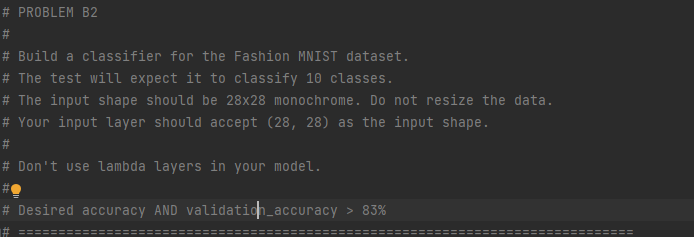

In [ ]:
import tensorflow as tf

In [ ]:
def solution_B2():
    fashion_mnist = tf.keras.datasets.fashion_mnist
    (training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
    # NORMALIZE YOUR IMAGE HERE
    training_images = training_images / 255.0
    test_images = test_images / 255.0
    # DEFINE YOUR MODEL HERE
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
    # End with 10 Neuron Dense, activated by softmax
        tf.keras.layers.Dense(10, activation='softmax')])
    # COMPILE MODEL HERE
    class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        print(logs.get('accuracy'))
        if((logs.get('accuracy') > 0.83) and (logs.get('val_accuracy')>0.83)):
          self.model.stop_training = True
    callbacks = myCallback()
    # TRAIN YOUR MODEL HERE
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(
        training_images,
        training_labels,
        batch_size=128,
        epochs=20,
        verbose=1,
        validation_data=(test_images, test_labels),
        callbacks=[callbacks])
    return model

In [ ]:
# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_B2()
    model.save("model_B2.h5")

C2
MNIST HANDWRITTEN DIGIT DATASET
10 CLASS
SOFTMAX

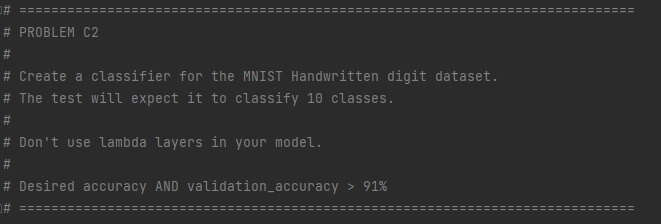

In [ ]:
import tensorflow as tf

In [ ]:
def solution_C2():
    mnist = tf.keras.datasets.mnist
    (training_images, training_labels), (test_images, test_labels) = mnist.load_data()
    # NORMALIZE YOUR IMAGE HERE
    training_images = training_images / 255.0
    test_images = test_images / 255.0
    # DEFINE YOUR MODEL HERE
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')])
    # End with 10 Neuron Dense, activated by softmax
        # COMPILE MODEL HERE
    model.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    # TRAIN YOUR MODEL HERE
    model.fit(training_images,
              training_labels,
              batch_size=128,
              epochs=5,
              verbose=1,
              validation_data=(test_images, test_labels))

    return model

In [ ]:
# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_C2()
    model.save("model_C2.h5")

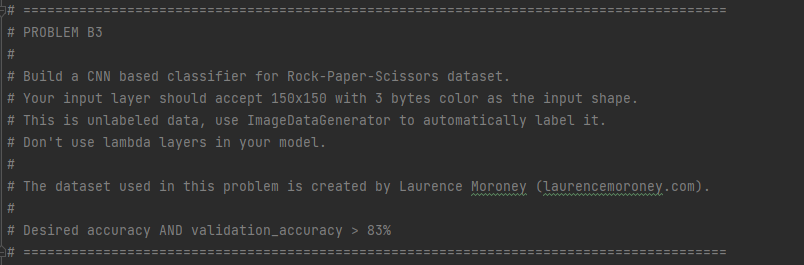

In [ ]:
import urllib.request
import zipfile
import tensorflow as tf
import os
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
def solution_B3():
    data_url = 'https://github.com/dicodingacademy/assets/releases/download/release-rps/rps.zip'
    urllib.request.urlretrieve(data_url, 'rps.zip')
    local_file = 'rps.zip'
    zip_ref = zipfile.ZipFile(local_file, 'r')
    zip_ref.extractall('data/')
    zip_ref.close()

    TRAINING_DIR = "data/rps/"
    training_datagen = ImageDataGenerator(rescale = 1/255,
                                          horizontal_flip = True,
                                          zoom_range = 0.2,
                                          shear_range = 0.2,
                                          validation_split = 0.2)
        # YOUR CODE HERE)

    # YOUR IMAGE SIZE SHOULD BE 150x150
    # Make sure you used "categorical"
    train_generator=training_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                         subset="training",
                                                         target_size=(150,150),
                                                         class_mode="categorical") # YOUR CODE HERE

    validation_generator = training_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                                subset="validation",
                                                                target_size=(150, 150),
                                                                class_mode="categorical")

    model=tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(512, activation='relu'),
    # YOUR CODE HERE, end with 3 Neuron Dense, activated by softmax
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        print(logs.get('accuracy'))
        if((logs.get('accuracy') > 0.83) and (logs.get('val_accuracy')>0.83)):
          self.model.stop_training = True

    callbacks = myCallback()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(
        train_generator,
        batch_size=128,
        epochs=20,
        verbose=1,
        validation_data=validation_generator,
        callbacks=[callbacks])

    return model

In [ ]:
# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model=solution_B3()
    model.save("model_B3.h5")

KeyboardInterrupt: ignored

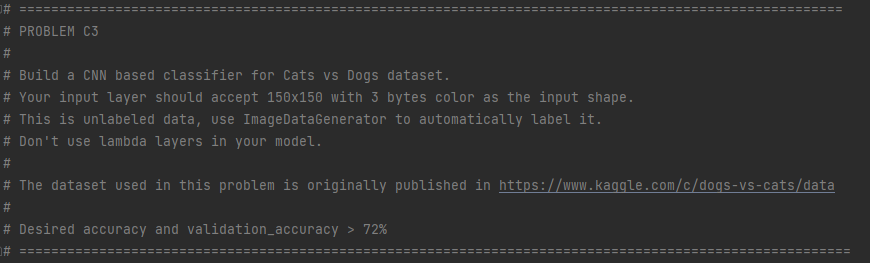

In [ ]:
import tensorflow as tf
import urllib.request
import zipfile
import tensorflow as tf
import os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def solution_C3():
    data_url = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/cats_and_dogs.zip'
    urllib.request.urlretrieve(data_url, 'cats_and_dogs.zip')
    local_file = 'cats_and_dogs.zip'
    zip_ref = zipfile.ZipFile(local_file, 'r')
    zip_ref.extractall('data/')
    zip_ref.close()

    BASE_DIR = 'data/cats_and_dogs_filtered'
    train_dir = os.path.join(BASE_DIR, 'train')
    validation_dir = os.path.join(BASE_DIR, 'validation')

    train_datagen = ImageDataGenerator(rescale=1.0 / 255.,
                                       rotation_range=30,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode="nearest")  # YOUR CODE HERE

    # YOUR IMAGE SIZE SHOULD BE 150x150
    # Make sure you used "categorical"
    train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150)) # YOUR CODE HERE
    validation_datagen = ImageDataGenerator(rescale=1.0 / 255.,
                                            rotation_range=30,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True,
                                            fill_mode="nearest")
    validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                                  batch_size=100,
                                                                  class_mode='binary',
                                                                  target_size=(150, 150))

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        # YOUR CODE HERE, end with a Neuron Dense, activated by 'sigmoid'
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])
    model.fit_generator(train_generator,
                        epochs=30,
                        verbose=1,
                        validation_data=validation_generator)
    return model


In [ ]:
# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_C3()
    model.save("model_C3.h5")
